In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
# from jupyterthemes import jtplot
# jtplot.style()
from segmenter import *
from IPython.core.debugger import set_trace
from fastai.conv_learner import *
import create_csvs as cc
torch.cuda.is_available(), torch.backends.cudnn.enabled

/home/sean/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


(True, True)

In [23]:
PATH = Path('/home/sean/hpc-home/skin_cancer/')
test_folder = 'ISIC/ISIC-2017_Test_v2_Data_Classification/'
test_csv = PATH / 'ISIC/test_isic17.csv'

test_mel_p = PATH / 'ISIC/test_mel_17.csv'
test_ker_p = PATH / 'ISIC/test_ker_17.csv'
test_all_p = PATH / 'ISIC/test_all_17.csv'
test_raw_p = PATH / 'ISIC/test_raw_17.csv'

train_isic_derm = PATH / 'train_dermofit_isic17.csv'

train_skp = PATH / 'train_multi_sk.csv'
train_melp = PATH / 'train_multi_mel.csv'
train_all = PATH / 'train_multi.csv'
train_raw = PATH / 'train_multi_raw.csv'

train_raw_half_ia_nervi = PATH / 'train_multi_raw_half_ia_nervi.csv'
train_all_half_ia_nervi = PATH / 'train_multi_half_ia_nervi.csv'

train_raw_no_ia_nervi = PATH / 'train_multi_raw_no_ia_nervi.csv'
train_all_no_ia_nervi = PATH / 'train_multi_half_no_nervi.csv'

train_sk_half = PATH / 'train_mutli_SK_half.csv'
train_sk_seg = PATH / 'train_SK_seg_isic17_dermo.csv'

%ls $PATH

dermofit/                        train_multi_mel.csv*
ISIC/                            train_multi_Mel_half.csv*
isic18_p3_test_data*             train_multi_no_ia_nervi.csv*
isic_archive/                    train_multi_raw.csv*
models/                          train_multi_raw_half_ia_nervi.csv*
ph2dataset/                      train_multi_raw_no_ia_nervi.csv*
test_isic17_dermofitLabels.csv*  train_multi_sk.csv*
tmp/                             train_mutli_SK_half.csv*
train_dermofit_isic17.csv*       train_seg_isic17_dermo.csv*
train_Mel_seg_isic17_dermo.csv*  train_SK_seg_isic17_dermo.csv*
train_multi.csv*                 train_test_Mel_seg_isic17_dermo.csv*
train_multi_half_ia_nervi.csv*   val_isic17.csv*


In [5]:
mtrain = cc.combine_training()
mtrain.isnull().values.any()

--- Load ISIC 17 Train set
nevus        1372
melanoma      374
keratosis     254
Name: classes, dtype: int64
                                               melanoma  keratosis   classes
image                                                                       
ISIC/ISIC-2017_Training_Data/ISIC_0000000.jpg         0          0     nevus
ISIC/ISIC-2017_Training_Data/ISIC_0000001.jpg         0          0     nevus
ISIC/ISIC-2017_Training_Data/ISIC_0000002.jpg         1          0  melanoma
ISIC/ISIC-2017_Training_Data/ISIC_0000003.jpg         0          0     nevus
ISIC/ISIC-2017_Training_Data/ISIC_0000004.jpg         1          0  melanoma
--- Load ISIC Archive Dataset
nevus        3335
melanoma      701
keratosis       9
Name: classes, dtype: int64
                                                  melanoma  keratosis  \
image                                                                   
isic_archive/images/5436e3acbae478396759f0e5.jpg         0          0   
isic_archive/images/5

False

0    6394
1    1221
Name: melanoma, dtype: int64
0    7053
1     562
Name: keratosis, dtype: int64


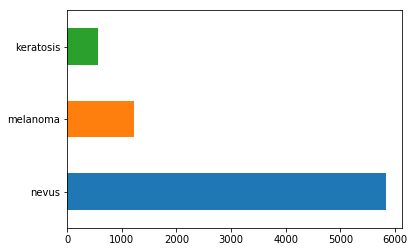

In [12]:
print(mtrain['melanoma'].value_counts())
print(mtrain['keratosis'].value_counts())

mtrain['classes'].value_counts().plot(kind='barh')

In [2]:
mtrain_h = cc.combine_training(half_ia=True)
mtrain_h.isnull().values.any()

--- Load ISIC 17 Train set


/home/sean/anaconda3/envs/fastai/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


nevus        1372
melanoma      374
keratosis     254
Name: classes, dtype: int64
                                               melanoma  keratosis   classes
image                                                                       
ISIC/ISIC-2017_Training_Data/ISIC_0000000.jpg         0          0     nevus
ISIC/ISIC-2017_Training_Data/ISIC_0000001.jpg         0          0     nevus
ISIC/ISIC-2017_Training_Data/ISIC_0000002.jpg         1          0  melanoma
ISIC/ISIC-2017_Training_Data/ISIC_0000003.jpg         0          0     nevus
ISIC/ISIC-2017_Training_Data/ISIC_0000004.jpg         1          0  melanoma
--- Load Half Nevus ISIC Archive Dataset
nevus        1667
melanoma      701
keratosis       9
Name: classes, dtype: int64
                                                  melanoma  keratosis  \
image                                                                   
isic_archive/images/5593f47b9fc3c131551460fc.jpg         0          0   
isic_archive/images/5436e3f4bae478396

False

0    4726
1    1221
Name: melanoma, dtype: int64
0    5385
1     562
Name: keratosis, dtype: int64


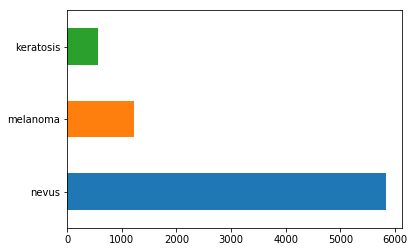

In [6]:
print(mtrain_h['melanoma'].value_counts())
print(mtrain_h['keratosis'].value_counts())

mtrain_h['classes'].value_counts().plot(kind='barh')
mtrain['classes'].value_counts().plot(kind='barh')